# Causal inference in multisensory perception
### Paola Suárez and Jiameng Wu

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats.distributions as dists
import itertools
import matplotlib.cm as cm
import matplotlib.colors as colors
#import seaborn as sb

%matplotlib inline

## 1. Implement the model

### Probability of a common cause

In [2]:
# Default parameters
p_com0 = 0.8
sigma_v0 = 0.6
sigma_a0 = 3.1
sigma_p0 = 15
mu_p = 0

In [3]:
def prob_C1(x_v, x_a, sigma_v=sigma_v0, sigma_a=sigma_a0, sigma_p=sigma_p0, p_com=p_com0, mu_p=mu_p):
    """
    Inference of the ideal observer of the probability of a common cause given noisy stimuli p(C = 1|xv,xa)
    """
    denominator = ( sigma_v**2 * sigma_a**2 + \
                    sigma_v**2 * sigma_p**2 + \
                    sigma_a**2 * sigma_p**2 )
    
    cond_C1 = np.exp(-.5 * \
                         ((x_v - x_a)**2 * sigma_p**2 + \
                          (x_v - mu_p)**2 * sigma_a**2 + \
                          (x_a - mu_p)**2 * sigma_v**2) / \
                         denominator) / \
              (2*np.pi*np.sqrt(denominator))
        
    cond_C2 = np.exp(-.5 * \
                        ((x_v - mu_p)**2 / (sigma_v**2 + sigma_p**2) + \
                         (x_a - mu_p)**2 / (sigma_a**2 + sigma_p**2))) / \
              (2*np.pi*np.sqrt( \
                          (sigma_v**2 + sigma_p**2) * \
                          (sigma_a**2 + sigma_p**2)))
        
    p_C1 = cond_C1 * p_com / (cond_C1 * p_com + cond_C2 * (1-p_com))
    
    return p_C1, x_v-x_a

In [4]:
# Position values
pos = np.array([-12, -6, 0, 6, 12])

In [5]:
# Noisy stimuli
n = 10
x = np.linspace(pos.min(), pos.max(), n*(pos.max() - pos.min())+1)
x_v, x_a = np.meshgrid(x, x)
x_v = x_v.reshape(len(x)**2)
x_a = x_a.reshape(len(x)**2)

In [6]:
# Obtain probs
p_C1s, disparity = prob_C1(x_v, x_a)

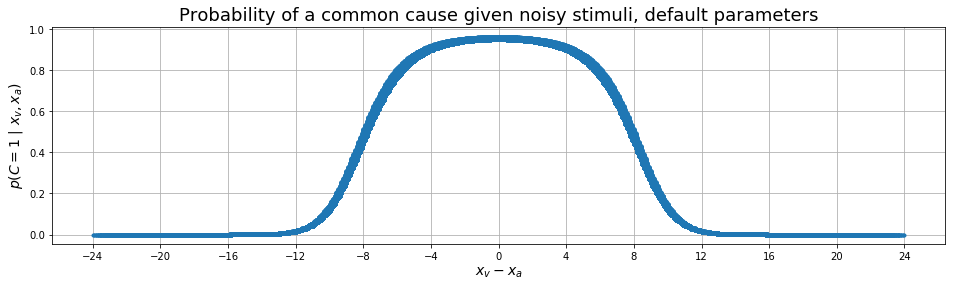

In [7]:
# Visualize
plt.figure(figsize=(16,4))
plt.plot(disparity, p_C1s, '.')
plt.title("Probability of a common cause given noisy stimuli, default parameters", size=18)
plt.xlabel(r'$x_v - x_a$', size=14)
plt.ylabel(r'$p(C=1\ |\ x_v, x_a)$', size=14)
plt.xticks(np.linspace(2*pos.min(),2*pos.max(),13))
plt.grid()
plt.show()

### Change parameters and explain

In [8]:
# Vary p_com separately
p_C1s_v1 = []
p_coms = np.linspace(0, 1, 6)
for p_com in p_coms:
    p_C1s, disparity = prob_C1(x_v, x_a, p_com=p_com)
    p_C1s_v1.append(p_C1s)
    
# Vary sigma_v separately
p_C1s_v2 = []
sigma_vs = [0.1, 0.5,  1., 3., 5.]
for sigma_v in sigma_vs:
    p_C1s, disparity = prob_C1(x_v, x_a, sigma_v=sigma_v)
    p_C1s_v2.append(p_C1s)
    
# Vary sigma_a separately
p_C1s_v3 = []
sigma_as = [0.1, 1.5, 3.5, 5.5]
for sigma_a in sigma_as:
    p_C1s, disparity = prob_C1(x_v, x_a, sigma_a=sigma_a)
    p_C1s_v3.append(p_C1s)
    
# Vary sigma_p separately
p_C1s_v4 = []
sigma_ps = [0.5, 1, 5, 10, 15, 24]
for sigma_p in sigma_ps:
    p_C1s, disparity = prob_C1(x_v, x_a, sigma_p=sigma_p)
    p_C1s_v4.append(p_C1s)

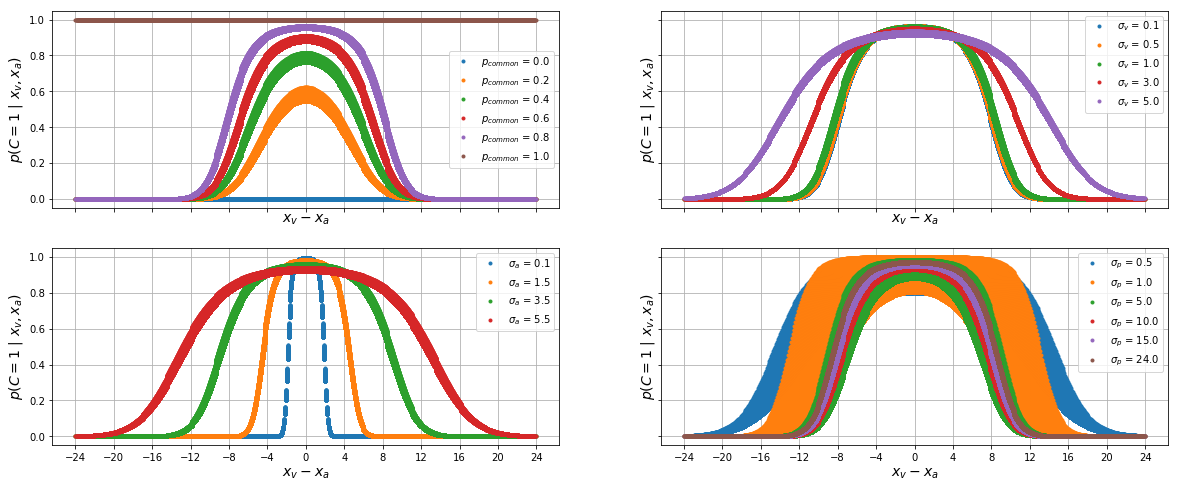

In [9]:
# Visualize
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(20,8))
axes = axes.ravel()
params = [p_coms, sigma_vs, sigma_as, sigma_ps]
labels = [r'$p_{common}$', r'$\sigma_v$', r'$\sigma_a$', r'$\sigma_p$']
for j, p_C1s_v in enumerate([p_C1s_v1, p_C1s_v2, p_C1s_v3, p_C1s_v4]):
    for i, p_C1s in enumerate(p_C1s_v):
        axes[j].plot(disparity, p_C1s, '.', label=str(labels[j])+" = %.1f"%params[j][i])
    #axes[j].set_title("Probability of a common cause given noisy stimuli, change sigma_a", size=18)
    axes[j].set_xlabel(r'$x_v - x_a$', size=14)
    axes[j].set_ylabel(r'$p(C=1\ |\ x_v, x_a)$', size=14)
    axes[j].set_xticks(np.linspace(2*pos.min(),2*pos.max(),13))
    axes[j].legend()
    axes[j].grid()
plt.show()

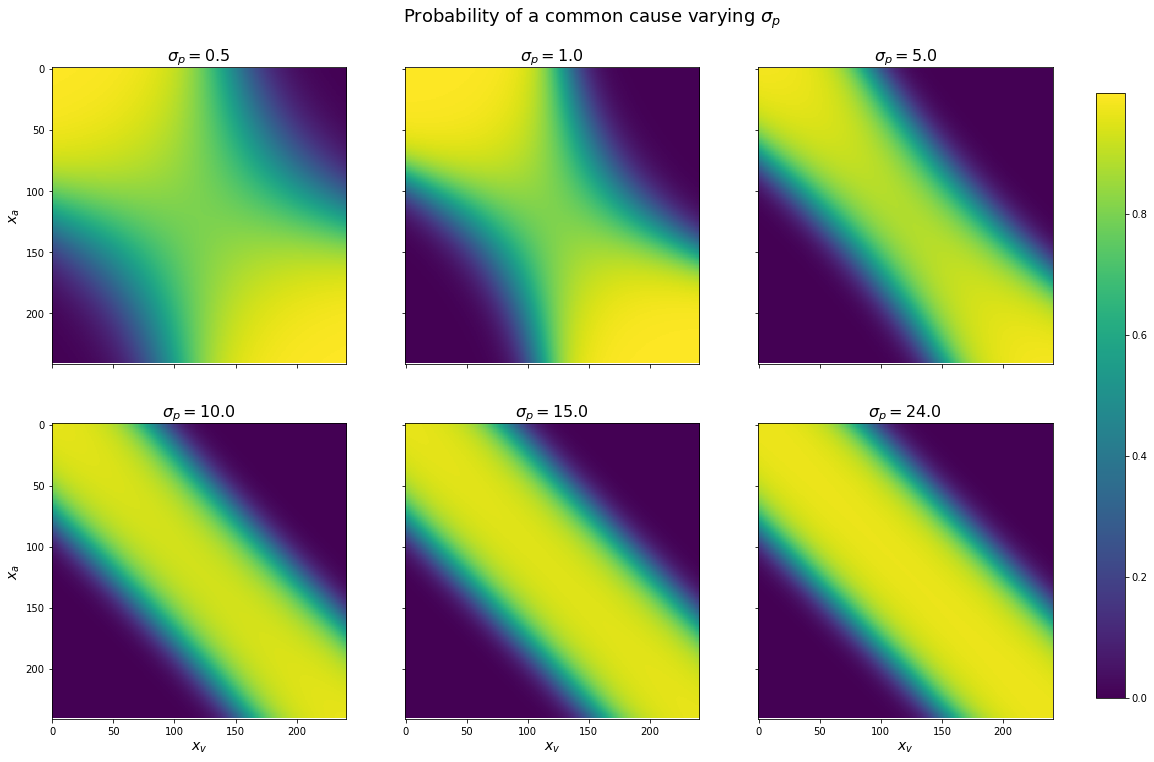

In [10]:
# What is happening with sigma_p?
vmin, vmax = np.min(p_C1s_v4), np.max(p_C1s_v4)

fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(20,12))
axes = axes.ravel()
for i, p_C1s in enumerate(p_C1s_v4):
    p_C1s = p_C1s.reshape(len(x), len(x))
    axes[i].imshow(p_C1s, vmin=vmin, vmax=vmax)
    axes[i].set_title(r"$\sigma_p = %.1f$" %sigma_ps[i], size=16)
    if i in {0, 3}:
        axes[i].set_ylabel(r"$x_a$", size=14)
    if i in {3, 4, 5}:
        axes[i].set_xlabel(r"$x_v$", size=14)

fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
norm =  colors.Normalize(vmin=vmin, vmax=vmax)
s_m =  cm.ScalarMappable(norm=norm)
s_m.set_array(np.linspace(vmin, vmax))
fig.colorbar(s_m, cax=cbar_ax)

fig.suptitle(r"Probability of a common cause varying $\sigma_p$", size=18, y=0.95)
plt.show()

Read the paper for interpretation.

sigma = 0 does't make sense ---> prob is going to be p_com

### Estimate stimulus position

In [11]:
def estimates(x_v, x_a, sigma_v=sigma_v0, sigma_a=sigma_a0, sigma_p=sigma_p0, p_com=p_com0):
    """
    The optimal estimate of the stimuli's position is the one that minimizes the mean expected squared error.
    """
    p_C1, _ = prob_C1(x_v, x_a, sigma_v, sigma_a, sigma_p, p_com)
    
    s_v_C1 = (x_v/sigma_v**2 + x_a/sigma_a**2 + mu_p/sigma_p**2) / \
             (1/sigma_v**2 + 1/sigma_a**2 + 1/sigma_p**2)
            
    s_a_C1 = s_v_C1
    
    s_v_C2 = (x_v/sigma_v**2 + mu_p/sigma_p**2) / \
             (1/sigma_v**2 + 1/sigma_p**2)
        
    s_a_C2 = (x_a/sigma_a**2 + mu_p/sigma_p**2) / \
             (1/sigma_a**2 + 1/sigma_p**2)
    
    est_v = p_C1 * s_v_C1 + (1 - p_C1)*s_v_C2
    est_a = p_C1 * s_a_C1 + (1 - p_C1)*s_a_C2
    
    return est_v, est_a

In [12]:
# Assume x_a is fixed at 0
x_a = 0
x_v = x.copy()

est_v, est_a = estimates(x_v, x_a)

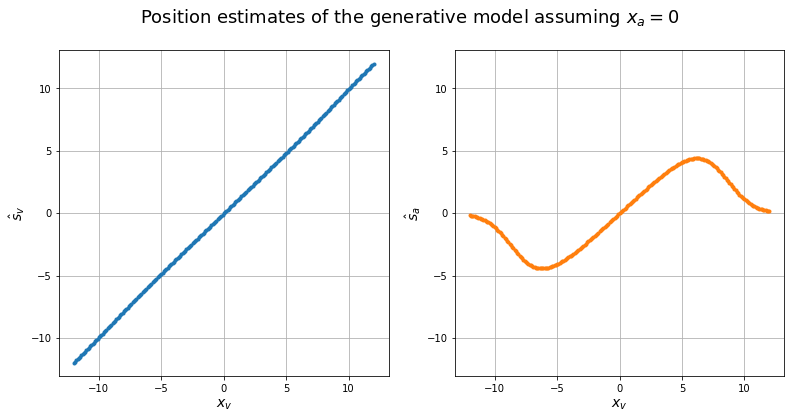

In [13]:
# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,6))
fig.suptitle(r"Position estimates of the generative model assuming $x_a=0$", size=18)
ax1.plot(x_v, est_v, '.C0')
ax1.axis('equal')
ax1.set_xlabel(r'$x_v$', size=14)
ax1.set_ylabel(r'$\hat{s}_v$', size=14)
ax1.grid()

ax2.plot(x_v, est_a, '.C1')
ax2.axis('equal')
ax2.set_xlabel(r'$x_v$', size=14)
ax2.set_ylabel(r'$\hat{s}_a$', size=14)
ax2.grid()
plt.show()

In [14]:
# Vary p_com separately
estims_v1 = []
p_coms = np.linspace(0, 1, 6)
for p_com in p_coms:
    est_v, est_a = estimates(x_v, x_a, p_com=p_com)
    estims_v1.append([est_v, est_a])
    
# Vary sigma_v separately
estims_v2 = []
sigma_vs = [0.1, 0.5,  1., 3., 5.]
for sigma_v in sigma_vs:
    est_v, est_a = estimates(x_v, x_a, sigma_v=sigma_v)
    estims_v2.append([est_v, est_a])
    
# Vary sigma_a separately
estims_v3 = []
sigma_as = [0.1, 1.5, 3.5, 5.5]
for sigma_a in sigma_as:
    est_v, est_a = estimates(x_v, x_a, sigma_a=sigma_a)
    estims_v3.append([est_v, est_a])
    
# Vary sigma_p separately
estims_v4 = []
sigma_ps = [0.5, 1, 5, 10, 15, 24]
for sigma_p in sigma_ps:
    est_v, est_a = estimates(x_v, x_a, sigma_p=sigma_p)
    estims_v4.append([est_v, est_a])

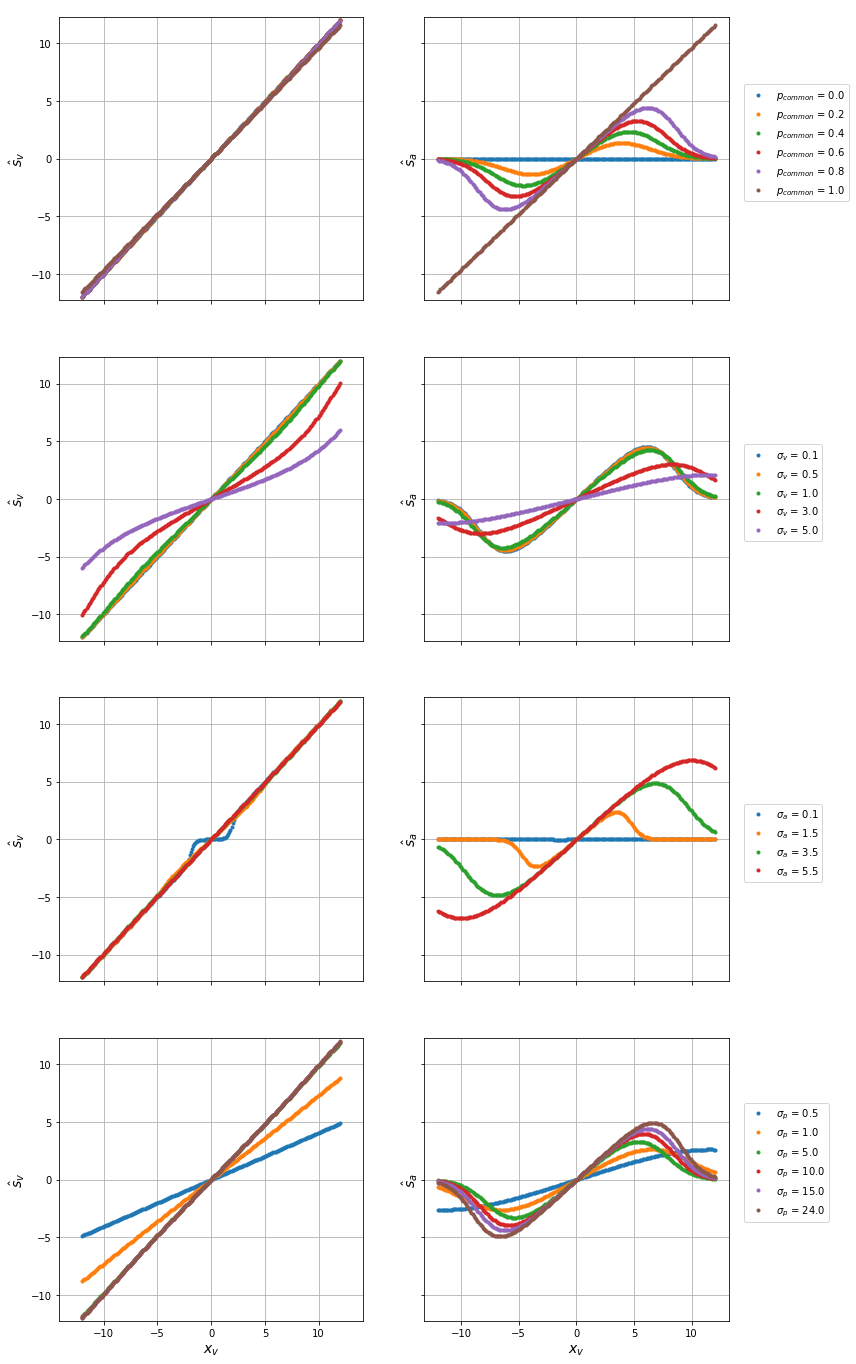

In [15]:
# Visualize
fig, axes = plt.subplots(4, 2, sharex="col", sharey=True, figsize=(12,24))
#axes = axes.ravel()
params = [p_coms, sigma_vs, sigma_as, sigma_ps]
labels = [r'$p_{common}$', r'$\sigma_v$', r'$\sigma_a$', r'$\sigma_p$']
for j, estims in enumerate([estims_v1, estims_v2, estims_v3, estims_v4]):
    for i, (est_v, est_a) in enumerate(estims):
        axes[j,0].plot(x_v, est_v, '.', label=str(labels[j])+" = %.1f"%params[j][i])
        axes[j,1].plot(x_v, est_a, '.', label=str(labels[j])+" = %.1f"%params[j][i])
    axes[j,0].set_ylabel(r'$\hat{s}_v$', size=14)
    axes[j,1].set_ylabel(r'$\hat{s}_a$', size=14)
    axes[j,0].axis('equal')
    axes[j,1].axis('equal')
    axes[j,1].legend(loc=(1.05, 0.35))
    #axes[j,1].legend()
    axes[j,0].grid()
    axes[j,1].grid()
axes[j,0].set_xlabel(r'$x_v$', size=14)
axes[j,1].set_xlabel(r'$x_v$', size=14)
plt.show()

sigma_p = 0.1 is almost a flat line. As we saw before, the smaller the sigma_p, the common cause will be 0.8.
The smaller the value, the estimate is going to be more centrally located at the middle. And viceversa.

sigma_v and sigma_a determine how sure you're about your perception. The smaller determines which one you're more sure, the broader the least accurate your estimation.

### Predicted distribution of visual positions through marginalization

#### How you might evaluate the integral $p(\hat{s}_v | s_v, s_a) = \int\int p(\hat{s}_v | x_v, x_a) p(x_v | s_v) p(x_a | s_a) dx_v dx_a$ ?

#### What kind of function is $p(\hat{s}_v | x_v, x_a)$ ? How does it affect the analytical evaluation of the integral?

In this paper we correctly deal with this issue by marginalizing over the latent variables x_a and x_v

These response distributions were obtained through simulation.

We need to simulate!

### Numerical method for obtaining estimates

In [16]:
sigma_v0 = 0.6
samples = 10000 #1e4
x_v = np.random.normal(pos, sigma_v0, size=(samples,len(pos)))#.reshape(samples*len(pos))
x_a = np.random.normal(0, sigma_a0, size=(samples, len(pos)))

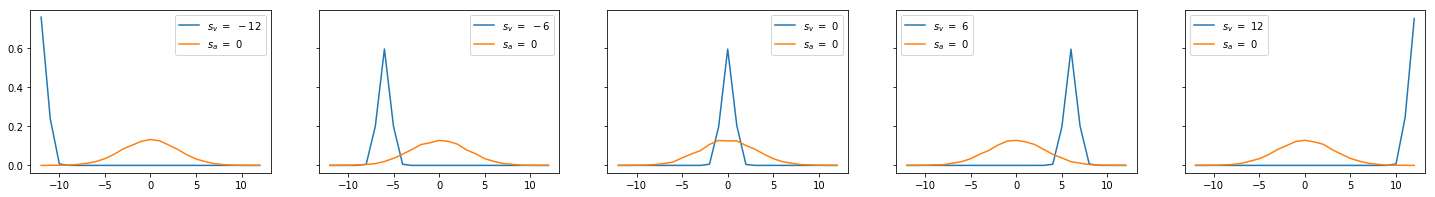

In [17]:
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(25,3))
for i in range(len(pos)):
    hist_v, _ = np.histogram(x_v[:,i], bins=np.linspace(-12.5,12.5,26), density=True)
    #print(np.shape(hist_v))
    #print(np.sum(hist_v))
    hist_a, _ = np.histogram(x_a[:,i], bins=np.linspace(-12.5,12.5,26), density=True)
    #print(np.shape(hist_a))
    axes[i].plot(np.linspace(-12,12,25), hist_v, label=r'$s_v\ =\ %d$'%pos[i])
    axes[i].plot(np.linspace(-12,12,25), hist_a, label=r'$s_a\ =\ %d$'%0)
    axes[i].legend()
plt.show()

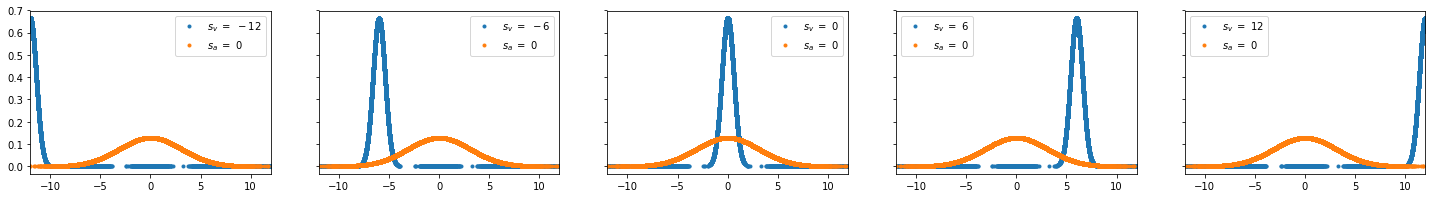

In [18]:
pdf_x_v = []
pdf_x_a = []
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(25,3))
for i in range(len(pos)):
    pdf_v = dists.norm.pdf(x_v.reshape(samples*len(pos)), loc=pos[i], scale=sigma_v0)
    pdf_a = dists.norm.pdf(x_a.reshape(samples*len(pos)), loc=0, scale=sigma_a0)
    pdf_x_v.append(pdf_v)
    pdf_x_a.append(pdf_a)
    axes[i].plot(x_v.reshape(samples*len(pos)), pdf_v,'.', label=r'$s_v\ =\ %d$'%pos[i])
    axes[i].plot(x_a.reshape(samples*len(pos)), pdf_a, '.', label=r'$s_a\ =\ %d$'%0)
    axes[i].legend()
    axes[i].set_xlim(-12, 12)
plt.show()

In [19]:
# Estimate
est_v, est_a = estimates(x_v, x_a)

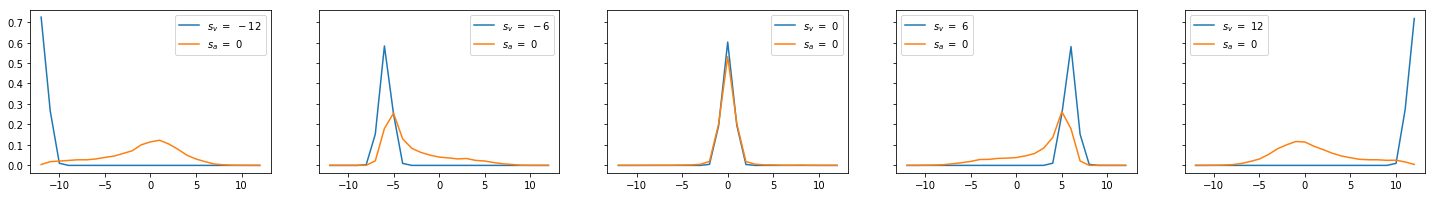

In [20]:
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(25,3))
for i in range(len(pos)):
    est_v, est_a = estimates(x_v[:,i], x_a[:,i])
    hist_v, _ = np.histogram(est_v, bins=np.linspace(-12.5,12.5,26), density=True)
    #print(np.shape(hist_v))
    #print(np.sum(hist_v))
    hist_a, _ = np.histogram(est_a, bins=np.linspace(-12.5,12.5,26), density=True)
    #print(np.shape(hist_a))
    axes[i].plot(np.linspace(-12,12,25), hist_v, label=r'$s_v\ =\ %d$'%pos[i])
    axes[i].plot(np.linspace(-12,12,25), hist_a, label=r'$s_a\ =\ %d$'%0)
    axes[i].legend()
plt.show()

In [21]:
#plt.figure()
#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
#ax1.imshow(vv)
#ax2.imshow(aa)
#plt.show()

## 2. Fit the model to experimental data

### Generative model

In [22]:
def cont_to_disc(s):
    """
    Play with absolute values.
    """
    intervals = [-1000, -9, -3, 3, 9, 1000]
    s_disc = s.copy()
    for i in range(len(intervals)-1):
        a, b = intervals[i], intervals[i+1]
        mask = (a <= s) & (s < b)
        #a, b = intervals[i], intervals[i+1]
        #mask = np.logical_and(np.abs(b) < np.abs(s), np.abs(s)<=np.abs(a))
        s_disc[mask] = pos[i]
    return s_disc

In [23]:
def generate_sources(samples=10000, sigma_p=sigma_p0, p_com=p_com0):
    """
    Generate a set of sources as described by Körding et al., 2007
    """
    # Determine C=1 or C=2
    C = np.random.binomial(1, p_com, size=samples)
    num_C1 = C.sum()
    num_C2 = samples - num_C1
    
    # Draw one position for common cause, two for independent causes
    s = np.random.normal(0, sigma_p, 2*samples)
    
    # Generate sources
    s = cont_to_disc(s)

    # Estimulus pairs (s_v, s_a)(think spanish!)
    source_v = np.concatenate((s[:num_C1], s[num_C1:num_C1+num_C2]))
    source_a = np.concatenate((s[:num_C1], s[num_C1+num_C2:num_C1+2*num_C2]))
    
    return source_v, source_a, num_C1

In [24]:
# Set of stimulus pairs
s_v0, s_a0, _ = generate_sources()

It appears that the default parameters are very broad (the sigma_p=15) and this makes the histograms skewed towards the -12 and 12

In [25]:
# Try different sigma_p
s_v, s_a, _ = generate_sources(sigma_p=5)

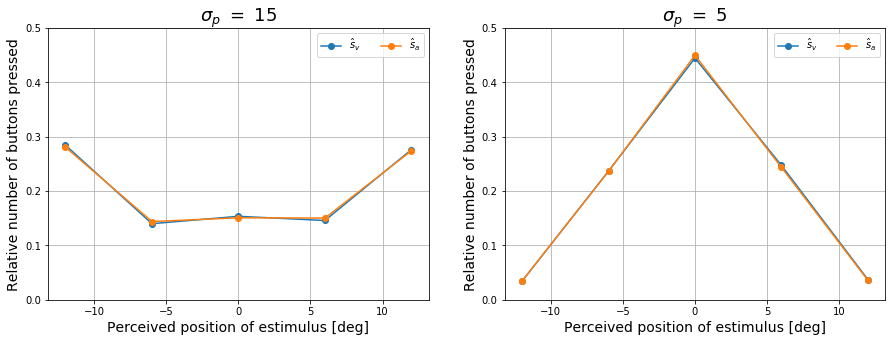

In [26]:
to_plot = [[s_v0, s_a0], [s_v, s_a]]

title = [r"$\sigma_p\ =\ %d$"%sigma_p0, r"$\sigma_p\ =\ %d$"%5]
plt.figure(figsize=(15,5))
for i, source in enumerate(to_plot):
    hist_v, _ = np.histogram(source[0], bins=np.linspace(-12.5,12.5,26), density=True)
    hist_a, _ = np.histogram(source[1], bins=np.linspace(-12.5,12.5,26), density=True)
    plt.subplot(1,2,i+1)
    plt.plot(np.linspace(-12,12,5), hist_v[hist_v!=0], "o-", label=r'$\hat{s}_v$')
    plt.plot(np.linspace(-12,12,5), hist_a[hist_a!=0], "o-", label=r'$\hat{s}_a$')
    plt.title(title[i], size=18)
    plt.xlabel("Perceived position of estimulus [deg]", size=14)
    plt.ylabel("Relative number of buttons pressed", size=14)
    plt.legend(ncol=2)
    plt.ylim(0,0.5)
    plt.grid()
plt.show()

Maybe it will be good to to a function for plotting the histograms

### Position estimates must be discrete

In [27]:
def sources_to_inputs(s_v, s_a, sigma_v=sigma_v0, sigma_a=sigma_a0):
    """
    Take one pair of sources and transformed them into noisy inputs.
    """
    x_v = np.random.normal(s_v, sigma_v)
    x_a = np.random.normal(s_a, sigma_a)
    return x_v, x_a

In [28]:
def plot_button_presses(press_v, press_a, num_C1):
    # Histograms for common source
    hist_v_1, _ = np.histogram(press_v[:num_C1], bins=np.linspace(-12.5,12.5,26), density=True)
    hist_a_1, _ = np.histogram(press_a[:num_C1], bins=np.linspace(-12.5,12.5,26), density=True)
    # Histograms for separate sources
    hist_v_2, _ = np.histogram(press_v[num_C1:], bins=np.linspace(-12.5,12.5,26), density=True)
    hist_a_2, _ = np.histogram(press_a[num_C1:], bins=np.linspace(-12.5,12.5,26), density=True)
    to_plot = [[hist_v_1, hist_a_1], [hist_v_2, hist_a_2]]
    
    title = ["Common source (C=1)", "Independent source (C=2)"]
    
    plt.figure(figsize=(15,5))
    for i, (hist_v, hist_a) in enumerate(to_plot):
        plt.subplot(1,2,i+1)
        plt.plot(np.linspace(-12,12,5), hist_v[hist_v!=0], "o-", label=r'$\hat{s}_v$')
        plt.plot(np.linspace(-12,12,5), hist_a[hist_a!=0], "o-", label=r'$\hat{s}_a$')
        plt.title(title[i], size=18)
        plt.xlabel("Perceived position of estimulus [deg]", size=14)
        plt.ylabel("Relative number of buttons pressed", size=14)
        plt.legend(ncol=2)
        plt.ylim(0,0.5)
        plt.grid()
    plt.show()

In [29]:
def most_awesome_plot(hist_v, hist_a):
    fig, axes = plt.subplots(6, 6, sharex=True, sharey=True, figsize=(10,10))
    for iv, v in enumerate(pos):
        for ia, a in enumerate(pos):
            axes[iv,ia+1].plot(pos, hist_v[iv*5+ia], label='Visual')
            axes[iv,ia+1].plot(pos, hist_a[iv*5+ia], label='Auditory') 
            axes[iv,ia+1].axis('off')

        pos_list = list(pos)
        _ = pos_list.pop(iv)

        axes[-1,iv+1].scatter(pos_list, [.1]*4, marker='o', s=60, c='C1')
        axes[iv,0].scatter(pos_list, [.1]*4, marker='o', s=60, c='C0')

        axes[-1,iv+1].scatter(pos[iv], .1, marker=(5,1), s=120, c='C1')
        axes[iv,0].scatter(pos[iv], .1, marker=(5,1), s=120, c='C0')

        axes[-1,iv+1].axis('off')
        axes[iv,0].axis('off')


    axes[-1,0].plot(-12, 0, markersize=0, label='Visual', c='C0')
    axes[-1,0].plot(-12, 0, markersize=0, label='Auditory', c='C1') 
    axes[-1,0].legend(bbox_to_anchor=(1, 1), fontsize='small')

    axes[-1,0].spines['right'].set_visible(False)
    axes[-1,0].spines['top'].set_visible(False)
    axes[-1,0].yaxis.set_ticks_position('left')
    axes[-1,0].xaxis.set_ticks_position('bottom')
    axes[-1,0].set_xticks(pos)
    axes[-1,0].set_yticks([0, 1])

    plt.show()

In [56]:
def make_button_presses(samples=10000, sigma_v=sigma_v0, sigma_a=sigma_a0, sigma_p=sigma_p0, p_com=p_com0, plot=True):
    """
    Ideal observer
    """
    # Set of stimulus pairs
    s_v, s_a, num_C1 = generate_sources(samples, sigma_p, p_com)
    
    # Noisy inputs
    x_v, x_a = sources_to_inputs(s_v, s_a, sigma_v, sigma_a)
    
    # Estimates
    est_v, est_a = estimates(x_v, x_a, sigma_v, sigma_a, sigma_p, p_com)
    
    # Make presses
    press = cont_to_disc(np.concatenate((est_v, est_a)))
    press_v, press_a = press[:samples], press[samples:]
    
    # Obtain histograms
    p_v = []
    p_a = []
    n_v = []
    n_a = []
    for iv, v in enumerate(pos):
        for ia, a in enumerate(pos):
            index = (s_v==v) & (s_a==a)
            n = index.sum()
            if n==0:
                n_v_ = np.zeros(5)
                n_a_ = np.zeros(5)
                hist_v = np.zeros(5)
                hist_a = np.zeros(5)
            else:
                n_v_, _ = np.histogram(press_v[index], bins=np.linspace(-15,15,6)) 
                n_a_, _ = np.histogram(press_a[index], bins=np.linspace(-15,15,6))
                hist_v = n_v_ / n
                hist_a = n_a_ / n
            n_v.append(n_v_)
            n_a.append(n_a_)
            p_v.append(hist_v)
            p_a.append(hist_a)
    
    if plot:
        #plot_button_presses(press_v, press_a, num_C1)
        most_awesome_plot(p_v, p_a)
        
    return np.array(p_v), np.array(p_a), np.array(n_v), np.array(n_a)

### Experimental data

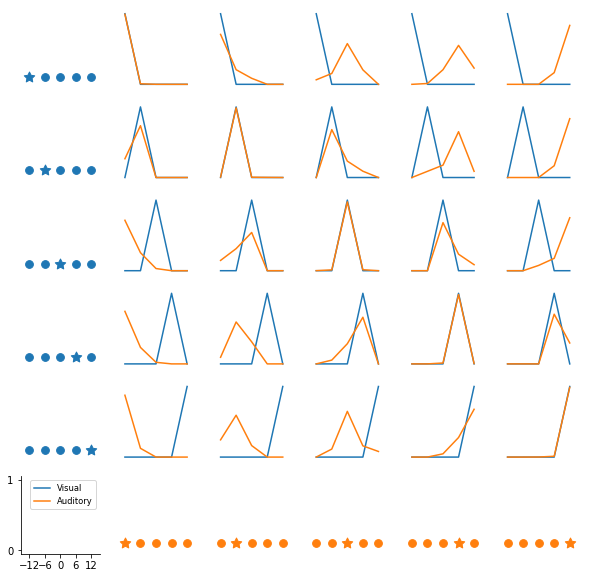

CPU times: user 3.01 s, sys: 30.3 ms, total: 3.04 s
Wall time: 3.04 s


In [31]:
%%time
# Default parameters for experimental data
_, _, n_v, n_a = make_button_presses() #plot=False)
experiment = [n_v, n_a]

### Numerical properties of the generative model

In [68]:
def log_likelihood(p_v, p_a, n_v, n_a):
    """
    Computes eq. 16 of Körding et al., 2007
    Overall log likelihood
    """
    
    log_v = np.multiply(np.log(p_v+1e-20), n_v).sum()
    log_a = np.multiply(np.log(p_a+1e-20), n_a).sum()
    
    return log_v + log_a
    #return log_v, log_a

In [69]:
def fit_model(experiment, samples=100000, sigma_v=sigma_v0, sigma_a=sigma_a0, sigma_p=sigma_p0, p_com=p_com0):
    """
    Ten times more than exp.
    """
    p_v, p_a, _, _ = make_button_presses(samples, sigma_v, sigma_a, sigma_p, p_com, plot=False)
    log_lik = log_likelihood(p_v, p_a, *experiment)
    return log_lik

In [70]:
%%time
# Default parameters for model
log0 = fit_model(experiment)

CPU times: user 80.4 ms, sys: 7.62 ms, total: 88 ms
Wall time: 86.8 ms


In [71]:
log0

-1872.369369995849

### Test using different parameters

In [72]:
%%time
# Tweeked parameters
log = fit_model(experiment, sigma_v=10.5, sigma_a=15.5, sigma_p=2, p_com=0.1)

CPU times: user 73.6 ms, sys: 9.95 ms, total: 83.5 ms
Wall time: 84.4 ms


In [73]:
log

-785181.51671096962

still unsure of the output of log_likelihood... 

### Fitting - naïve approach

In [80]:
%%time
p_coms = np.linspace(0, 1, 11)
sigma_vs = np.linspace(0, 20, 12)[1:]
sigma_as = sigma_vs.copy()
sigma_ps = sigma_vs.copy()
logs_pc = np.zeros(p_coms.shape)
logs_sv = logs_pc.copy()
logs_sa = logs_pc.copy()
logs_sp = logs_pc.copy()

for i, p_com in enumerate(p_coms):
    logs_pc[i] = fit_model(experiment, p_com=p_com)
    logs_sv[i] = fit_model(experiment, sigma_v=sigma_vs[i])
    logs_sa[i] = fit_model(experiment, sigma_a=sigma_as[i])
    logs_sp[i] = fit_model(experiment, sigma_p=sigma_ps[i])  
    
parameters = [p_coms[:-1], sigma_vs, sigma_as, sigma_ps[1:]]
true_paras = [p_com0, sigma_v0, sigma_a0, sigma_p0]

CPU times: user 3.04 s, sys: 248 ms, total: 3.29 s
Wall time: 3.31 s


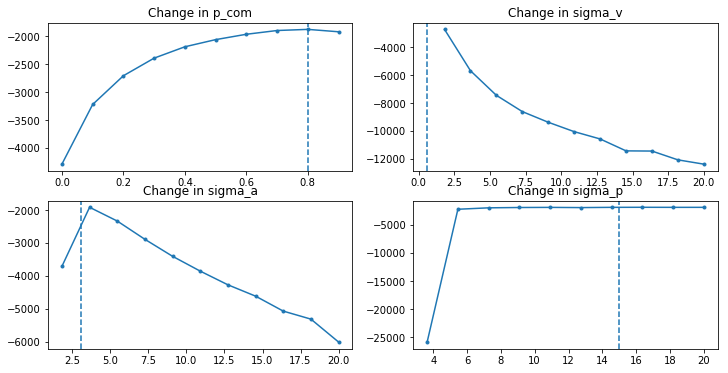

In [81]:
fig, axes = plt.subplots(2,2, figsize=(12,6))
axes = axes.ravel()
labels = ["p_com", "sigma_v", "sigma_a", "sigma_p"]
for i, logs in enumerate([logs_pc[:-1], logs_sv, logs_sa, logs_sp[1:]]):
    axes[i].plot(parameters[i], logs, '.-')
    axes[i].set_title("Change in "+ str(labels[i]))
    axes[i].axvline(x=true_paras[i], linestyle='dashed')
plt.show()

In [88]:
def grid_search(parameters):
    p_coms, sigma_vs, sigma_as, sigma_ps = parameters
    logs = np.zeros((len(p_coms), len(sigma_vs), len(sigma_as), len(sigma_ps)))
    count = 0
    for i, p_com in enumerate(p_coms):
        for j, sigma_v in enumerate(sigma_vs):
            for k, sigma_a in enumerate(sigma_as):
                for l, sigma_p in enumerate(sigma_ps):
                    if count%1000 == 0:
                        print('%d trials finished' %count)
                    logs[i,j,k,l] = fit_model(experiment, sigma_v=sigma_v, sigma_a=sigma_a, sigma_p=sigma_p, p_com=p_com)
                    count += 1
    return logs

In [136]:
# grid search coarse
p_coms =  np.arange(0, 1.1, 0.1)#[1:]
sigma_vs = np.arange(0.1, 20, 2)
sigma_as = sigma_vs.copy()
sigma_ps = sigma_vs.copy()

grob_params = [p_coms, sigma_vs, sigma_as, sigma_ps]
true_params = [p_com0, sigma_v0, sigma_a0, sigma_p0]

In [ ]:
%%time

logs_grob = grid_search(parameters)

In [137]:
index = np.where(logs_grob == logs_grob.max())
index_grob = []
finer_bounds = []
for i, idx in enumerate(index):
    j = idx[0]
    index_grob.append(j)
    #print(parameters[i][j])
    #print(true_paras[i])
    if j==0:
        finer_bounds.append([grob_params[i][j], grob_params[i][j+1]])
    else:
        finer_bounds.append([grob_params[i][j-1], grob_params[i][j+1]])

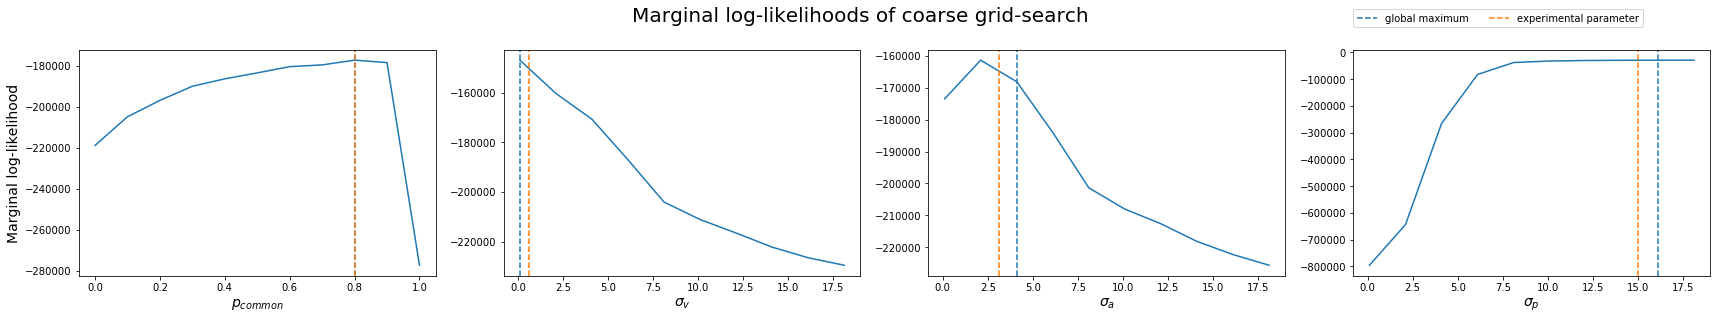

In [153]:
xlabels = [r'$p_{common}$', r'$\sigma_v$', r'$\sigma_a$', r'$\sigma_p$']

fig, axes = plt.subplots(1, 4, figsize=(24, 4))
axes = axes.ravel()
for i in range(len(axes)):
    axis_tuple = list(range(4))
    axis_tuple.remove(i)
    axes[i].plot(grob_params[i], logs_grob.mean(axis=tuple(axis_tuple)))
    axes[i].axvline(x=grob_params[i][index_grob[i]], linestyle='dashed', label='global maximum')
    axes[i].axvline(x=true_params[i], linestyle='dashed', color='C1', label='experimental parameter')
    axes[i].set_xlabel(xlabels[i], size=14)
axes[0].set_ylabel('Marginal log-likelihood', size=14)
axes[-1].legend(loc=(0, 1.1), ncol=2)
fig.suptitle('Marginal log-likelihoods of coarse grid-search', size=20, y=1.1)
plt.tight_layout()
plt.show()

In [117]:
# grid search fine
finer_params = []
for (a,b) in finer_bounds:
    finer_params.append(np.linspace(a, b, 8))

In [118]:
%%time

logs_fine = grid_search(finer_params)

0 trials finished
1000 trials finished
2000 trials finished
3000 trials finished
4000 trials finished
CPU times: user 4min 41s, sys: 27.1 s, total: 5min 8s
Wall time: 5min 10s


In [125]:
index = np.where(logs_fine == logs_fine.max())
index_max = []
for i, idx in enumerate(index):
    j = idx[0]
    index_max.append(j)
    print(finer_params[i][j])
    print(true_params[i])

0.785714285714
0.8
0.385714285714
0.6
3.24285714286
3.1
16.3857142857
15


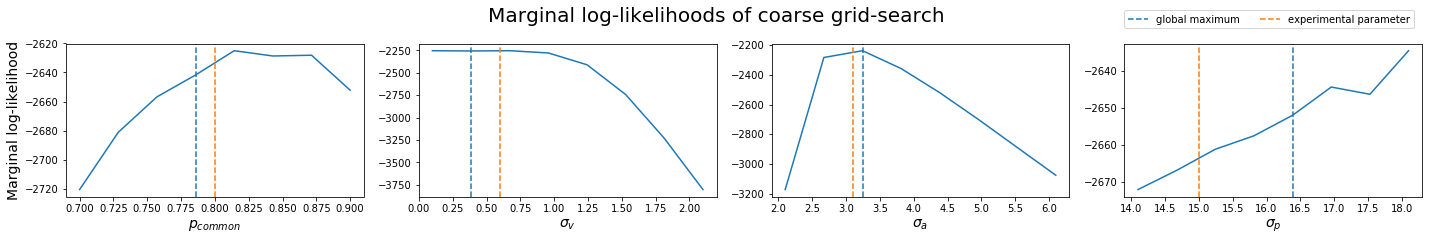

In [154]:
xlabels = [r'$p_{common}$', r'$\sigma_v$', r'$\sigma_a$', r'$\sigma_p$']

fig, axes = plt.subplots(1, 4, figsize=(20, 3))
axes = axes.ravel()
for i in range(len(axes)):
    axis_tuple = list(range(4))
    axis_tuple.remove(i)
    axes[i].plot(finer_params[i], logs_fine.mean(axis=tuple(axis_tuple)))
    axes[i].axvline(x=finer_params[i][index_max[i]], linestyle='dashed', label='global maximum')
    axes[i].axvline(x=true_params[i], linestyle='dashed', color='C1', label='experimental parameter')
    axes[i].set_xlabel(xlabels[i], size=14)
axes[0].set_ylabel('Marginal log-likelihood', size=14)
axes[-1].legend(loc=(0, 1.1), ncol=2)
fig.suptitle('Marginal log-likelihoods of coarse grid-search', size=20, y=1.1)
plt.tight_layout()
plt.show()

### Fitting - MCMC approach

In [ ]:
import emcee
import corner

In [ ]:
def lnprior(params):
    p_com, sigma_v, sigma_a, sigma_p = params
    if 0 <= p_com <= 1 and 0.0 < sigma_v < 20.0 and 0.0 < sigma_a < 20.0 and 0.0 < sigma_p < 20.0:
        return 0.0
    return -np.inf

package emcee

package corner